In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [2]:
files = glob('../data/binance/*')

## Create a DataFrame with daily closing value for exchanges for which we have longer than a year of data

In [3]:
main_df = pd.DataFrame(index=range(1004))
for f in files:
    exchange = f[16:-8]
    print(exchange)
    df = pd.read_parquet(f)
    daily = df['close'].resample('D').mean()
    if len(daily) < 365:
        continue
    else:
        main_df[exchange] = 0
        main_df[exchange][-len(daily):] = daily.values

LUN-BTC
BCD-BTC


/home/dipshady/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


STX-BTC
BNBBEAR-USDT
POA-BNB
BNT-BUSD
POA-BTC
CTXC-BNB
ETC-BUSD
XRPBULL-BUSD
OMG-BTC
NAS-BTC
NULS-BTC
ETH-TRY
BTT-BNB
XRP-ETH
ONG-USDT
WAVES-USDC
FTM-USDT
DCR-BTC
PHB-PAX
BAT-TUSD
USDT-ZAR
XLM-BUSD
XVG-ETH
XMR-BNB
EOSBULL-BUSD
BRD-ETH
BCC-BNB
DLT-BTC
BQX-BTC
WINGS-ETH
ETH-EUR
RLC-USDT
WIN-BNB
QLC-BNB
NEO-BTC
ETH-PAX
STORM-BTC
ONE-PAX
TNT-ETH
RDN-ETH
COCOS-USDT
STORJ-BTC
GNT-BTC
NAV-ETH
COS-BNB
DUSK-BTC
TCT-USDT
SNT-ETH
VIA-BNB
BCH-BUSD
SNGLS-BTC
XZC-XRP
ENJ-USDT
BNT-BTC
ICX-BTC
BTC-ZAR
LTO-BTC
PHX-BNB
VET-ETH
SC-BNB
CTXC-BTC
DCR-BNB
BCC-ETH
BNB-BTC
EOS-BUSD
DNT-ETH
LTC-PAX
PHX-BTC
RVN-BUSD
BQX-ETH
BTT-BTC
BAND-USDT
CHZ-USDT
FUN-USDT
USDC-BNB
NAV-BNB
SNM-BTC
QKC-BTC
DNT-BTC
WRX-USDT
KNC-BTC
REN-BTC
CELR-BNB
FET-BTC
BCHABC-BUSD
FET-BNB
BAT-PAX
WPR-BTC
BNB-ETH
ZEC-USDT
TRX-USDT
TRIG-BTC
MATIC-BTC
WAVES-BTC
BTC-USDS
NULS-USDT
ETHBULL-BUSD
LOOM-BTC
EVX-ETH
ETC-TUSD
CHAT-ETH
TUSD-BNB
CND-BNB
GVT-BTC
LSK-ETH
ATOM-PAX
ATOM-TUSD
ATOM-USDT
FTM-PAX
LTC-ETH
PHB-TUSD
TFUEL-TUSD
ZRX-USDT
LTO-USDT
CN

Fill in missing values by backfill and normalising. 

In [5]:
main_df = main_df.fillna(method='bfill')
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(main_df)

In [7]:
scaled_values.shape

(1004, 457)

In [12]:
scaled_df = pd.DataFrame(scaled_values, columns=main_df.columns)
scaled_df.head()

,LUN-BTC,BCD-BTC,POA-BNB,POA-BTC,OMG-BTC,NAS-BTC,NULS-BTC,BTT-BNB,XRP-ETH,ONG-USDT,...,HOT-BNB,ZEN-ETH,WAVES-BNB,ZEC-USDC,REP-ETH,BCHABC-USDT,NCASH-ETH,VIBE-BTC,DLT-BNB,LOOM-ETH
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PCA

We do PCA reduction to get all time series in equal length. Is there a better way? 

In [13]:
pca = PCA(n_components=365, svd_solver='auto')
pca_values = pca.fit_transform(scaled_df.values.T)

In [14]:
pca_df = pd.DataFrame(pca_values.T, columns=main_df.columns)

In [15]:
pca_df.head()

,LUN-BTC,BCD-BTC,POA-BNB,POA-BTC,OMG-BTC,NAS-BTC,NULS-BTC,BTT-BNB,XRP-ETH,ONG-USDT,...,HOT-BNB,ZEN-ETH,WAVES-BNB,ZEC-USDC,REP-ETH,BCHABC-USDT,NCASH-ETH,VIBE-BTC,DLT-BNB,LOOM-ETH
0,-4.513434,-4.807485,-2.267312,-4.352393,-5.223604,-0.798028,-4.681768,1.274529,3.121979,2.079237,...,2.977074,4.782981,-3.198485,5.933721,5.266838,5.604619,-3.606299,-3.428152,-3.892667,0.346321
1,-1.173270,-2.923562,-1.207231,-1.091869,0.247384,-0.973051,2.746176,-3.889781,6.470660,-3.825643,...,-3.730221,6.483660,-3.766912,-3.913724,4.330512,-3.887035,0.664148,-4.034152,-3.636187,4.095615
2,1.383898,0.947641,-4.510490,-0.642447,2.526808,-3.665773,1.912067,-1.654583,0.775694,-1.336267,...,-0.721504,-3.029655,-1.030755,1.011638,-1.716696,1.339247,-0.608792,-0.801368,0.625668,-3.202662
3,-0.026791,-0.274338,-0.279937,3.573478,0.382182,-0.044102,2.131690,-0.784661,-2.654737,-0.527063,...,-0.211193,0.491350,-1.309380,1.257518,0.173387,1.346529,3.092515,-0.496147,-1.854449,1.371563
4,0.431055,-0.631704,-2.163758,1.248863,-0.353385,-0.974667,0.423386,1.385680,0.459378,2.144612,...,0.933273,-3.189275,-0.353627,-0.473675,0.664909,-3.454165,1.050331,0.037849,-0.420350,0.917624


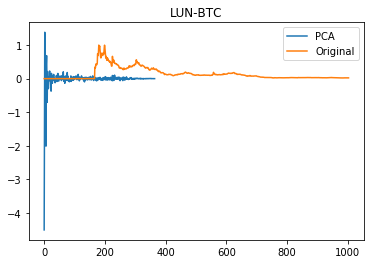

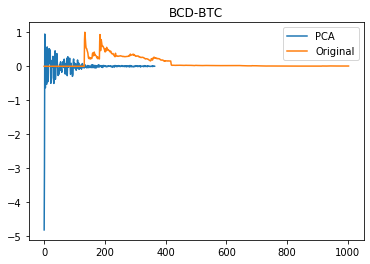

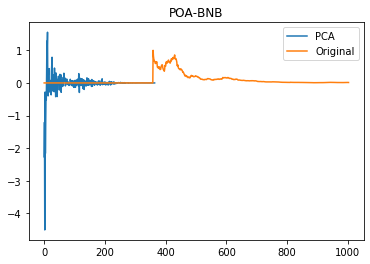

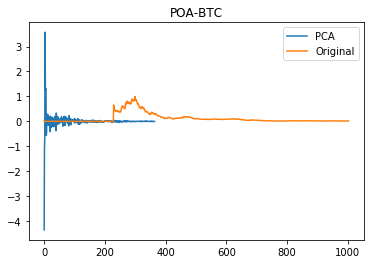

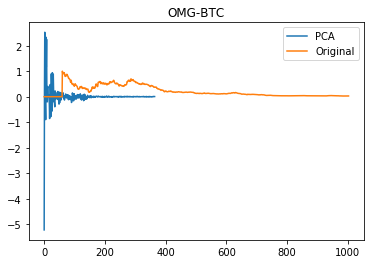

In [16]:
for i in pca_df.columns[:5]:
    plt.title(i)
    plt.plot(pca_df[i], label='PCA')
    plt.plot(scaled_df[i], label='Original')
    plt.legend()
    plt.show()

Well, the results don't look encouraging...

In [37]:
# from sklearn.metrics.pairwise import cosine_similarity as cosine